In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
dfCEAS = pd.read_csv('data/CEAS_08.csv')
dfSA = pd.read_csv('data/SpamAssasin.csv')

In [3]:
print("CEAS_08 Dataset")
print(f"Number of rows: {dfCEAS.shape[0]}, Number of Columns: {dfCEAS.shape[1]}")
print("Spam Assasin Dataset")
print(f"Number of rows: {dfSA.shape[0]}, Number of columns: {dfSA.shape[1]}")


CEAS_08 Dataset
Number of rows: 39154, Number of Columns: 7
Spam Assasin Dataset
Number of rows: 5809, Number of columns: 7


In [4]:
print(dfCEAS.info())
print(dfCEAS.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39154 entries, 0 to 39153
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sender    39154 non-null  object
 1   receiver  38692 non-null  object
 2   date      39154 non-null  object
 3   subject   39126 non-null  object
 4   body      39154 non-null  object
 5   label     39154 non-null  int64 
 6   urls      39154 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 2.1+ MB
None
                                              sender  \
0                   Young Esposito <Young@iworld.de>   
1                       Mok <ipline's1983@icable.ph>   
2  Daily Top 10 <Karmandeep-opengevl@universalnet...   
3                 Michael Parker <ivqrnai@pobox.com>   
4  Gretchen Suggs <externalsep1@loanofficertool.com>   

                                         receiver  \
0                     user4@gvc.ceas-challenge.cc   
1                   user2.2@gvc.ceas-challenge.cc   

In [5]:
print(dfSA.info())
print(dfSA.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5809 entries, 0 to 5808
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sender    5809 non-null   object
 1   receiver  5599 non-null   object
 2   date      5809 non-null   object
 3   subject   5793 non-null   object
 4   body      5808 non-null   object
 5   label     5809 non-null   int64 
 6   urls      5809 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 317.8+ KB
None
                                      sender  \
0             Robert Elz <kre@munnari.OZ.AU>   
1  Steve Burt <Steve_Burt@cursor-system.com>   
2              "Tim Chapman" <timc@2ubh.com>   
3           Monty Solomon <monty@roscom.com>   
4  Stewart Smith <Stewart.Smith@ee.ed.ac.uk>   

                                            receiver  \
0  Chris Garrigues <cwg-dated-1030377287.06fa6d@D...   
1  "'zzzzteana@yahoogroups.com'" <zzzzteana@yahoo...   
2              zzzzteana <zzzzteana@ya

In [6]:
dfCombine = pd.concat([dfCEAS, dfSA])
print(dfCombine.info())
print(dfCombine.head())

<class 'pandas.core.frame.DataFrame'>
Index: 44963 entries, 0 to 5808
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sender    44963 non-null  object
 1   receiver  44291 non-null  object
 2   date      44963 non-null  object
 3   subject   44919 non-null  object
 4   body      44962 non-null  object
 5   label     44963 non-null  int64 
 6   urls      44963 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 2.7+ MB
None
                                              sender  \
0                   Young Esposito <Young@iworld.de>   
1                       Mok <ipline's1983@icable.ph>   
2  Daily Top 10 <Karmandeep-opengevl@universalnet...   
3                 Michael Parker <ivqrnai@pobox.com>   
4  Gretchen Suggs <externalsep1@loanofficertool.com>   

                                         receiver  \
0                     user4@gvc.ceas-challenge.cc   
1                   user2.2@gvc.ceas-challenge.cc   
2    

In [7]:
print(dfCombine.duplicated().value_counts())

False    44963
Name: count, dtype: int64


In [8]:
print(dfCombine.iloc[0])

sender                       Young Esposito <Young@iworld.de>
receiver                          user4@gvc.ceas-challenge.cc
date                          Tue, 05 Aug 2008 16:31:02 -0700
subject                             Never agree to be a loser
body        Buck up, your troubles caused by small dimensi...
label                                                       1
urls                                                        1
Name: 0, dtype: object


label
1    23560
0    21403
Name: count, dtype: int64


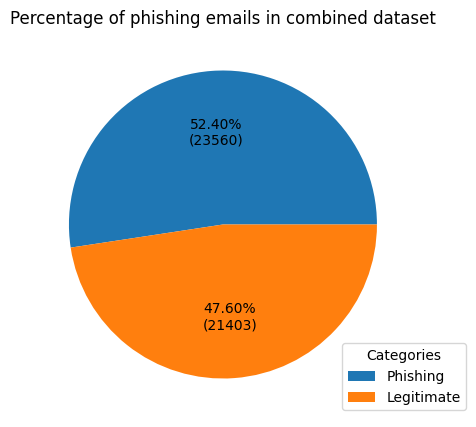

In [9]:
print(dfCombine['label'].value_counts())
labels = ['Phishing', 'Legitimate']
x = dfCombine['label'].value_counts()
plt.figure(figsize=(5,5))
def func(pct, values):
    absolute = int(pct/100.*sum(values))
    return '{:.2f}%\n({:d})'.format(pct, absolute)
plt.pie(x, colors=['tab:blue', 'tab:orange'], autopct=lambda pct: func(pct, x), startangle=0,)
plt.title('Percentage of phishing emails in combined dataset')
plt.legend(labels, title='Categories', loc='lower right', bbox_to_anchor=(1.15, 0))
plt.show()

In [10]:
print(dfCombine['sender'].value_counts())

sender
qydlqcws-iacfym@issues.apache.org                         462
Guido van Rossum <hoauf@python.org>                       295
"\\"Martin v. Löwis\\"" <qpnysl@v.loewis.de>              276
"Carlos E. R." <vyjwd.trpcau@telefonica.net>              208
Aaron Kulkis <cmiqlkx91@hotpop.com>                       183
                                                         ... 
Linwood Sloan <Linwood@goline.ca>                           1
puromaki <verkoeld1978@stfrancis.k12.mn.us>                 1
Maryellen Costello <shadiervh97@gillscruisecentre.com>      1
Daily Top 10 <steins@4000down.com>                          1
Daily Top 10 <orn|dent_1973@musicaedischi.it>               1
Name: count, Length: 27101, dtype: int64


In [11]:
print(dfCombine['receiver'].value_counts())

receiver
user6@gvc.ceas-challenge.cc                         1375
wkilxloc@opensuse.org                               1230
user2.1@gvc.ceas-challenge.cc                       1037
user2.2@gvc.ceas-challenge.cc                        922
user2.4@gvc.ceas-challenge.cc                        738
                                                    ... 
andrea_justice@yahoo.com, c3ponr2d2@hotmail.com,       1
jtr@usa.net                                            1
"FreeStoreClub" <breakfree@luxmail.com>                1
ilug@linux.ie, ilug-request@linux.ie                   1
<klaganga@hotmail.com>, <pipop@loxinfo.co.th>,         1
Name: count, Length: 5290, dtype: int64


In [12]:
print(dfCombine['date'].head())

0    Tue, 05 Aug 2008 16:31:02 -0700
1    Tue, 05 Aug 2008 18:31:03 -0500
2    Tue, 05 Aug 2008 20:28:00 -1200
3    Tue, 05 Aug 2008 17:31:20 -0600
4    Tue, 05 Aug 2008 19:31:21 -0400
Name: date, dtype: object


In [13]:
print(dfCombine['subject'].value_counts())

subject
CNN.com Daily Top 10                                                                                     2930
CNN Alerts: My Custom Alert                                                                              1406
Re:                                                                                                       581
123                                                                                                       255
Re:                                                                                                       125
                                                                                                         ... 
_Melhore sua segurana_                                                                                      1
ADV: Lowest life insurance rates available!                                                   irloq         1
** You're -Approved-! **                                                                                    1
He

urls
1    31234
0    13729
Name: count, dtype: int64


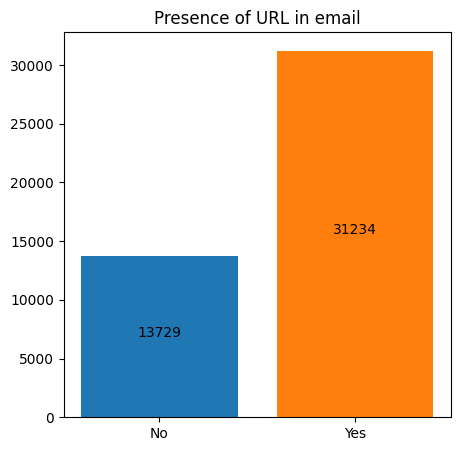

In [14]:
print(dfCombine['urls'].value_counts())
x = ['No', 'Yes']
y = dfCombine['urls'].value_counts(ascending=True)
plt.figure(figsize=(5,5))
plt.bar(x, y, color=['tab:blue','tab:orange'])
plt.title('Presence of URL in email')
for i in range(len(y)):
    plt.text(i , y[i]//2, y[i], ha='center')
plt.show()

In [15]:
dfCombine.dropna(axis=0, subset=['receiver', 'body'], inplace=True)
dfCombine.fillna({'subject': 'no subject'}, inplace=True)

FEATURE ENGINEERING

In [16]:
dfCombine["emailDomain"]=dfCombine['sender'].str.split('@').str[1]


In [17]:
print(dfCombine['emailDomain'].value_counts())
dfCombine[dfCombine['emailDomain'].str.contains(r'\.org(\.|$)', na=False)]['emailDomain']

emailDomain
gmail.com>                 2605
spamassassin.taint.org>     595
python.org>                 526
issues.apache.org           462
hotmail.com>                324
                           ... 
mandic.com.br                 1
e-frsecurities.com            1
go-fishing.co.uk>             1
tjohoo.se>                    1
collectorsinternet.com>       1
Name: count, Length: 18177, dtype: int64


C:\Users\Sebby\AppData\Local\Temp\ipykernel_14132\2358256227.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  dfCombine[dfCombine['emailDomain'].str.contains(r'\.org(\.|$)', na=False)]['emailDomain']


8            issues.apache.org
20             aaas-alerts.org
33                   crypt.org
38           issues.apache.org
53           issues.apache.org
                 ...          
5473    spamassassin.taint.org
5503    spamassassin.taint.org
5589    spamassassin.taint.org
5691    spamassassin.taint.org
5718       dogma.slashnull.org
Name: emailDomain, Length: 1222, dtype: object

In [18]:
publicEmailDomainRegex = r'^(gmail|hotmail|outlook|yahoo)\.com'
govRegex = r'\.gov(\.|$)'
eduRegex = r'\.edu(\.|$)'
orgRegex = r'\.org(\.|$)'
netRegex = r'\.net(\.|$)'

dfCombine['generalConsumer'] = dfCombine['emailDomain'].str.contains(publicEmailDomainRegex, regex=True, na=False).astype(int)
dfCombine['govDomain'] = dfCombine['emailDomain'].str.contains(govRegex, regex=True, na=False).astype(int)
dfCombine['eduDomain'] = dfCombine['emailDomain'].str.contains(eduRegex, regex=True, na=False).astype(int)
dfCombine['orgDomain'] = dfCombine['emailDomain'].str.contains(orgRegex, regex=True, na=False).astype(int)
dfCombine['netDomain'] = dfCombine['emailDomain'].str.contains(netRegex, regex=True, na=False).astype(int)

dfCombine['otherDomain'] = dfCombine[['generalConsumer', 'govDomain', 'eduDomain', 'orgDomain', 'netDomain']].apply(lambda row: 1 if (row == 0).all() else 0, axis=1)

C:\Users\Sebby\AppData\Local\Temp\ipykernel_14132\1189306920.py:7: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  dfCombine['generalConsumer'] = dfCombine['emailDomain'].str.contains(publicEmailDomainRegex, regex=True, na=False).astype(int)
C:\Users\Sebby\AppData\Local\Temp\ipykernel_14132\1189306920.py:8: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  dfCombine['govDomain'] = dfCombine['emailDomain'].str.contains(govRegex, regex=True, na=False).astype(int)
C:\Users\Sebby\AppData\Local\Temp\ipykernel_14132\1189306920.py:9: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  dfCombine['eduDomain'] = dfCombine['emailDomain'].str.contains(eduRegex, regex=True, na=False).astype(int)
C:\Users\Sebby\AppData\Local\Temp\ipykernel_14132\118

In [19]:
print(dfCombine['generalConsumer'].value_counts())
print(dfCombine['govDomain'].value_counts())
print(dfCombine['eduDomain'].value_counts())
print(dfCombine['orgDomain'].value_counts())
print(dfCombine['netDomain'].value_counts())
print(dfCombine['otherDomain'].value_counts())

generalConsumer
0    40875
1     3415
Name: count, dtype: int64
govDomain
0    44221
1       69
Name: count, dtype: int64
eduDomain
0    44063
1      227
Name: count, dtype: int64
orgDomain
0    43068
1     1222
Name: count, dtype: int64
netDomain
0    43916
1      374
Name: count, dtype: int64
otherDomain
1    38983
0     5307
Name: count, dtype: int64


In [20]:
govRegex = r'\.edu(\.|$)'
dfCombine[dfCombine['emailDomain'].str.contains(govRegex)==True]['emailDomain']


C:\Users\Sebby\AppData\Local\Temp\ipykernel_14132\338206002.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  dfCombine[dfCombine['emailDomain'].str.contains(govRegex)==True]['emailDomain']


203                  sbc.edu.sg>
206                  sbc.edu.sg>
1056                ustc.edu.cn>
1406        davaodoctors.edu.ph>
1800                 cs.orst.edu
                  ...           
3258                      vt.edu
3278          alumni.caltech.edu
3279          alumni.caltech.edu
3484          alumni.caltech.edu
3564    atlantic.gse.rmit.edu.au
Name: emailDomain, Length: 227, dtype: object

In [21]:
htmlPattern = r'<[^>]+>'
dfCombine['html'] = dfCombine['body'].str.contains(htmlPattern, regex=True, na=False).astype(int)
print(dfCombine['html'].value_counts())

html
0    39854
1     4436
Name: count, dtype: int64


In [22]:
punctuationRegex = r'[!?@_]'
dfCombine['punctuationCount'] = dfCombine['body'].str.count(punctuationRegex)
dfCombine['punctuationCount']

0         2
1         0
2        16
3       172
4         2
       ... 
5804     33
5805     18
5806     51
5807     57
5808      3
Name: punctuationCount, Length: 44290, dtype: int64

In [23]:
dfCombine['fullContent'] = dfCombine['subject'] + ' ' + dfCombine['body']
dfCombine['fullContent'] = dfCombine['fullContent'].str.lower()
cleanSpace = r'(^\w\s)'
dfCombine['fullContent'] = dfCombine['fullContent'].str.replace(cleanSpace,'')

In [24]:
dfCombine['subjectLength'] = dfCombine['subject'].astype(str).apply(lambda x: len(x))
dfCombine['bodyLength'] = dfCombine['body'].astype(str).apply(lambda x: len(x))
dfCombine['totalLength'] = dfCombine['fullContent'].astype(str).apply(lambda x: len(x))
print(dfCombine['subjectLength'])
print(dfCombine['bodyLength'])
print(dfCombine['totalLength'])

0        25
1        22
2        20
3       150
4        26
       ... 
5804     29
5805     38
5806     50
5807     19
5808     21
Name: subjectLength, Length: 44290, dtype: int64
0         273
1          82
2        3918
3       24418
4         175
        ...  
5804     3177
5805     3853
5806     2470
5807    23773
5808     2548
Name: bodyLength, Length: 44290, dtype: int64
0         299
1         105
2        3939
3       24569
4         202
        ...  
5804     3207
5805     3892
5806     2521
5807    23793
5808     2570
Name: totalLength, Length: 44290, dtype: int64


In [25]:
dfCombine

,sender,receiver,date,subject,body,label,urls,emailDomain,generalConsumer,govDomain,eduDomain,orgDomain,netDomain,otherDomain,html,punctuationCount,fullContent,subjectLength,bodyLength,totalLength
0,Young Esposito <Young@iworld.de>,user4@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 16:31:02 -0700",Never agree to be a loser,"Buck up, your troubles caused by small dimensi...",1,1,iworld.de>,0,0,0,0,0,1,0,2,"never agree to be a loser buck up, your troubl...",25,273,299
1,Mok <ipline's1983@icable.ph>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 18:31:03 -0500",Befriend Jenna Jameson,\nUpgrade your sex and pleasures with these te...,1,1,icable.ph>,0,0,0,0,0,1,0,0,befriend jenna jameson \nupgrade your sex and ...,22,82,105
2,Daily Top 10 <Karmandeep-opengevl@universalnet...,user2.9@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 20:28:00 -1200",CNN.com Daily Top 10,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,1,1,universalnet.psi.br>,0,0,0,0,0,1,1,16,cnn.com daily top 10 >+=+=+=+=+=+=+=+=+=+=+=+=...,20,3918,3939
3,Michael Parker <ivqrnai@pobox.com>,SpamAssassin Dev <xrh@spamassassin.apache.org>,"Tue, 05 Aug 2008 17:31:20 -0600",Re: svn commit: r619753 - in /spamassassin/tru...,Would anyone object to removing .so from this ...,0,1,pobox.com>,0,0,0,0,0,1,0,172,re: svn commit: r619753 - in /spamassassin/tru...,150,24418,24569
4,Gretchen Suggs <externalsep1@loanofficertool.com>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 19:31:21 -0400",SpecialPricesPharmMoreinfo,\nWelcomeFastShippingCustomerSupport\nhttp://7...,1,1,loanofficertool.com>,0,0,0,0,0,1,0,2,specialpricespharmmoreinfo \nwelcomefastshippi...,26,175,202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5804,Professional_Career_Development_Institute@Frug...,yyyy@netnoteinc.com,"Tue, 3 Dec 2002 13:19:58 -0800",Busy? Home Study Makes Sense!,\n\n \n--- \n![](http://images.pcdi-homestud...,1,1,FrugalJoe.com,0,0,0,0,0,1,0,33,busy? home study makes sense! \n\n \n--- \n!...,29,3177,3207
5805,"""IQ - TBA"" <tba@insiq.us>",<yyyy@spamassassin.taint.org>,"Tue, 3 Dec 2002 18:52:29 -0500",Preferred Non-Smoker Rates for Smokers,This is a multi-part message in MIME format. -...,1,1,insiq.us>,0,0,0,0,0,1,0,18,preferred non-smoker rates for smokers this is...,38,3853,3892
5806,Mike <raye@yahoo.lv>,Mailing.List@user2.pro-ns.net,"Sun, 20 Jul 2003 16:19:44 +0800","How to get 10,000 FREE hits per day to any web...","Dear Subscriber,\n\nIf I could show you a way ...",1,1,yahoo.lv>,0,0,0,0,0,1,0,51,"how to get 10,000 free hits per day to any web...",50,2470,2521
5807,"""Mr. Clean"" <cweqx@dialix.oz.au>",<Undisclosed.Recipients@webnote.net>,"Wed, 05 Aug 2020 04:01:50 -1900",Cannabis Difference,****Mid-Summer Customer Appreciation SALE!****...,1,0,dialix.oz.au>,0,0,0,0,0,1,0,57,cannabis difference ****mid-summer customer ap...,19,23773,23793


In [26]:
dfCorr = dfCombine[['urls', 'generalConsumer', 'govDomain', 'eduDomain', 'orgDomain', 'netDomain', 
                    'otherDomain', 'html', 'punctuationCount','subjectLength', 'bodyLength', 'label']]

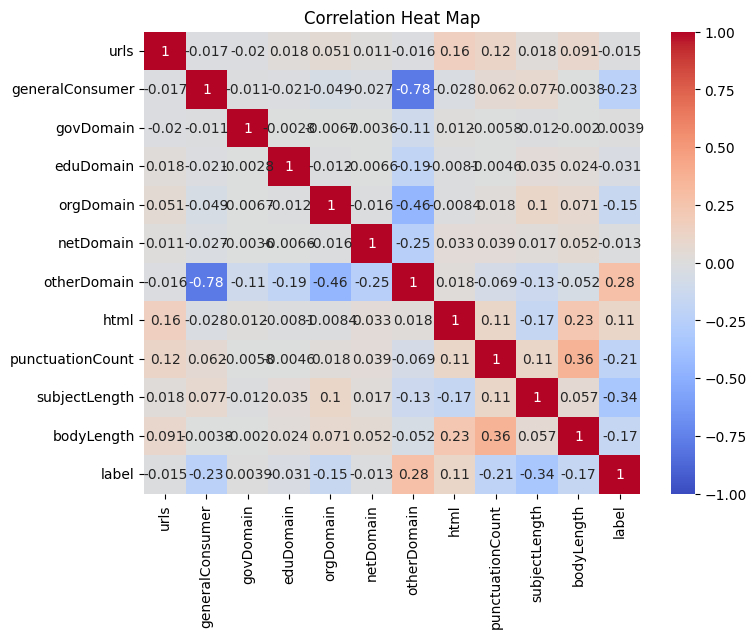

In [27]:
correlation_matrix = dfCorr.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heat Map')
plt.show()

In [28]:
dfCombine.to_csv("./data/cleanedData.csv", index=False)